In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32

In [ ]:
print("Loading IMDB dataset...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), "training sequences")
print(len(x_test), "test sequences")


Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 training sequences
25000 test sequences


In [ ]:
print("Pad sequences (samples x time)...")
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

Pad sequences (samples x time)...
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
print("Training the model...")
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=batch_size,
                    validation_split=0.2)

Training the model...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 107ms/step - accuracy: 0.5901 - loss: 0.6602 - val_accuracy: 0.7284 - val_loss: 0.5487
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.7356 - loss: 0.5210 - val_accuracy: 0.7894 - val_loss: 0.4607
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.8835 - loss: 0.2858 - val_accuracy: 0.7140 - val_loss: 0.5819
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9371 - loss: 0.1833 - val_accuracy: 0.5564 - val_loss: 0.9541
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 108ms/step - accuracy: 0.9148 - loss: 0.2064 - val_accuracy: 0.8052 - val_loss: 0.5848


In [ ]:
print("Evaluating model on test data...")
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

Evaluating model on test data...
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7984 - loss: 0.5936
Test Accuracy: 0.7997199892997742


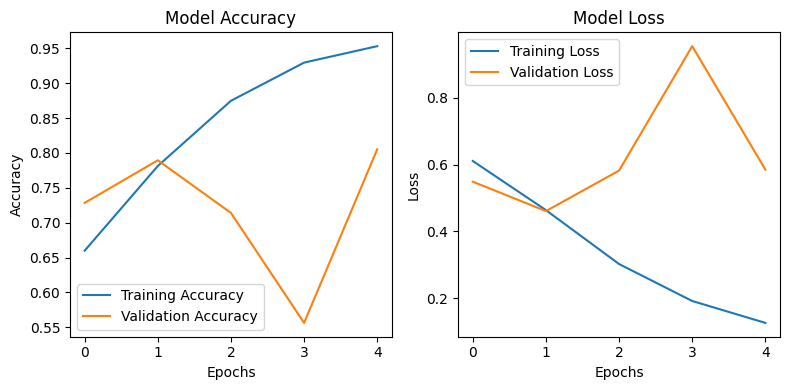

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()